# Features evaluaton

In [1]:
from IPython.display import clear_output

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [3]:
graph_dataset_names = [
    "infinityofspace/python_codestyles-random-500-graphs",
    "infinityofspace/python_codestyles-single-500-graphs",
    # "infinityofspace/python_codestyles-random-1k-graphs",
    # "infinityofspace/python_codestyles-single-1k-graphs"
]

In [4]:
from datasets import load_dataset

graph_datasets = [load_dataset(n).with_format("pt") for n in graph_dataset_names]
clear_output(wait=True)
for dataset in graph_datasets:
    print(dataset)

DatasetDict({
    test: Dataset({
        features: ['code_codestyle', 'style_context_codestyle', 'label', 'code_edges', 'code_node_classes', 'style_context_edges', 'style_context_node_classes'],
        num_rows: 28199
    })
    train: Dataset({
        features: ['code_codestyle', 'style_context_codestyle', 'label', 'code_edges', 'code_node_classes', 'style_context_edges', 'style_context_node_classes'],
        num_rows: 153999
    })
})
DatasetDict({
    test: Dataset({
        features: ['code_codestyle', 'style_context_codestyle', 'label', 'code_edges', 'code_node_classes', 'style_context_edges', 'style_context_node_classes'],
        num_rows: 28193
    })
    train: Dataset({
        features: ['code_codestyle', 'style_context_codestyle', 'label', 'code_edges', 'code_node_classes', 'style_context_edges', 'style_context_node_classes'],
        num_rows: 153991
    })
})


In [5]:
code_dataset_names = [
    "infinityofspace/python_codestyles-random-500",
    "infinityofspace/python_codestyles-single-500",
    # "infinityofspace/python_codestyles-random-1k",
    # "infinityofspace/python_codestyles-single-1k"
]

In [6]:
from datasets import load_dataset

code_datasets = [load_dataset(n) for n in code_dataset_names]
clear_output(wait=True)
for dataset in code_datasets:
    print(dataset)

DatasetDict({
    train: Dataset({
        features: ['code', 'code_codestyle', 'style_context', 'style_context_codestyle', 'label'],
        num_rows: 153999
    })
    test: Dataset({
        features: ['code', 'code_codestyle', 'style_context', 'style_context_codestyle', 'label'],
        num_rows: 28199
    })
})
DatasetDict({
    train: Dataset({
        features: ['code', 'code_codestyle', 'style_context', 'style_context_codestyle', 'label'],
        num_rows: 153991
    })
    test: Dataset({
        features: ['code', 'code_codestyle', 'style_context', 'style_context_codestyle', 'label'],
        num_rows: 28193
    })
})


In [7]:
from learning_to_style_check.features import tokenize

def tokenize_sample(sample):
    return {
        "code_tokenized": tokenize(sample["code"]),
        "style_context_tokenized": tokenize(sample["style_context"])
    }

tokenized_datasets = []
for dataset in code_datasets:
    tokenized_datasets.append(dataset.map(tokenize_sample, num_proc=os.cpu_count()))

In [5]:
from itertools import cycle

def plot_percentiles(values, labels, y_title, x_title="Percentile", line_styles=["solid", "dotted"], brake_axis=False, upper_brake_limit=None, lower_brake_limit=None):
    lin = np.linspace(0, 100, 1000)

    if brake_axis:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        fig.subplots_adjust(hspace=0.05)

        max_val = 0
        for vals, label, line_style in zip(values, labels, cycle(line_styles)):
            ax1.plot(lin, np.percentile(vals, lin), label=label, linestyle=line_style)
            ax2.plot(lin, np.percentile(vals, lin), label=label, linestyle=line_style)

            new_max_val = np.max(vals)
            if new_max_val > max_val:
                max_val = new_max_val

        ax1.set_ylim(upper_brake_limit, )
        ax2.set_ylim(0, lower_brake_limit)
        
        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_visible(False)
        ax1.xaxis.tick_top()
        ax1.tick_params(labeltop=False)
        ax2.xaxis.tick_bottom()
        
        d = .5
        kwargs = dict(marker=[(-1, -d), (1, d)],
                      markersize=12,
                      linestyle="none",
                      color='k',
                      mec='k',
                      mew=1,
                      clip_on=False)
        ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

        ax2.legend(bbox_to_anchor=(1.03, 1))
    else:
        ax = plt.gca()
    
        for vals, label, line_style in zip(values, labels, cycle(line_styles)):
            ax.plot(lin, np.percentile(vals, lin), label=label, linestyle=line_style)

        ax.legend(bbox_to_anchor=(1.03, 1))

    plt.ylabel(y_title)
    plt.xlabel(x_title)

    plt.tight_layout()
    
    plt.show()

## Dimmensionality

### Style Tree

Graph statistics for trees:

dataset 0
	code:
		top 50 most frequent degree by class
			 Module 5010621.0
			 FunctionDef 1749876.0
			 List 1567789.0
			 For 1013413.0
			 ClassDef 864359.0
			 Dict 862370.0
			 AnnAssign 835860.0
			 If 815750.0
			 IndentedBlock 813174.0
			 ImportFrom 768205.0
			 Call 718209.0
			 Tuple 634420.0
			 Param 592519.0
			 BinaryOperation 586081.0
			 Assign 575464.0
			 ComparisonTarget 566896.0
			 Subscript 495930.0
			 Attribute 477085.0
			 SimpleStatementLine 445529.0
			 Parameters 415722.0
			 CompFor 330393.0
			 BooleanOperation 321605.0
			 Annotation 311791.0
			 IfExp 310546.0
			 IndentSpacing 302222.0
			 Return 290523.0
			 Comparison 283905.0
			 DictElement 272229.0
			 Arg 258207.0
			 Else 246648.0
			 SimpleWhitespace 224449.0
			 ParenthesizedWhitespace 223243.0
			 Number 220149.0
			 AugAssign 207392.0
			 UnaryOperation 199639.0
			 EmptyLine 187479.0
			 TrailingWhitespace 183927.0
			 SimpleString 181041.0
			 Expr 173686.0
			 With 172452.0
			 Integer 

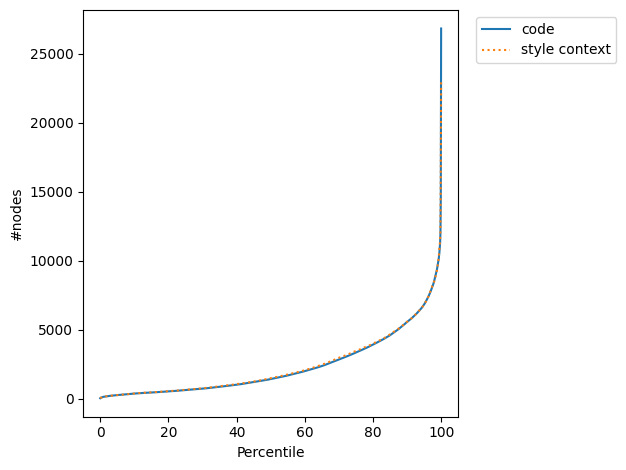

	code_degrees                   0
count  4.149895e+08
mean   9.995610e-01
std    3.129174e+00
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    2.251000e+03
	style_context_degrees                   0
count  4.233645e+08
mean   9.995696e-01
std    3.524958e+00
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    2.251000e+03


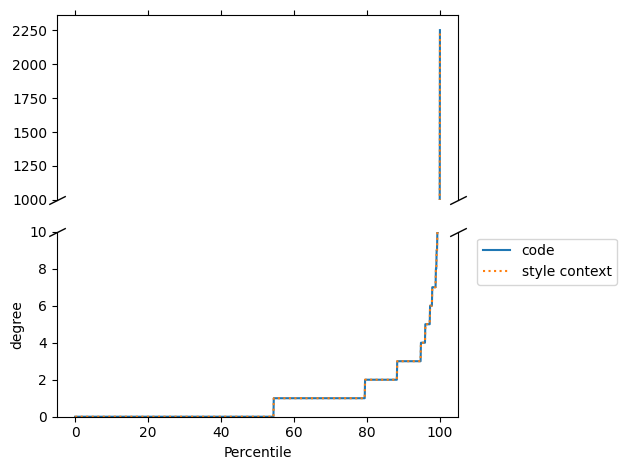


####################

dataset 1
	code:
		top 50 most frequent degree by class
			 Module 5039680.0
			 FunctionDef 1749918.0
			 List 1576000.0
			 For 1017880.0
			 Dict 875105.0
			 ClassDef 864854.0
			 AnnAssign 835134.0
			 If 815927.0
			 IndentedBlock 813651.0
			 ImportFrom 766812.0
			 Call 719505.0
			 Tuple 630993.0
			 Param 596514.0
			 BinaryOperation 586129.0
			 Assign 583103.0
			 ComparisonTarget 566974.0
			 Subscript 496101.0
			 Attribute 476635.0
			 SimpleStatementLine 442500.0
			 Parameters 414004.0
			 CompFor 330536.0
			 BooleanOperation 320902.0
			 Annotation 313571.0
			 IfExp 310792.0
			 IndentSpacing 304237.0
			 Return 290742.0
			 Comparison 283929.0
			 DictElement 271751.0
			 Arg 258586.0
			 Else 247602.0
			 SimpleWhitespace 227659.0
			 ParenthesizedWhitespace 223325.0
			 Number 220325.0
			 AugAssign 207555.0
			 UnaryOperation 199592.0
			 EmptyLine 187485.0
			 TrailingWhitespace 183983.0
			 SimpleString 180869.0
			 Expr 173296.0
			 Wit

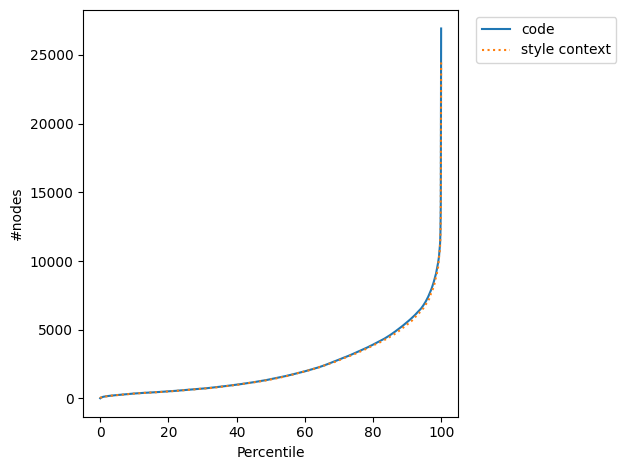

	code_degrees                   0
count  4.153996e+08
mean   9.995614e-01
std    3.074240e+00
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    2.251000e+03
	style_context_degrees                   0
count  4.066818e+08
mean   9.995520e-01
std    2.820851e+00
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    2.251000e+03


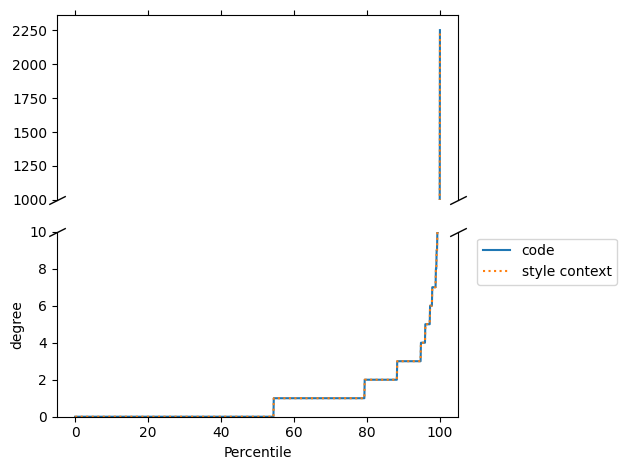


####################



In [9]:
from train import get_graphs
from learning_to_style_check.libcst import NODE_NAMES

top_most_frequent = 50
top_most_least = 150

def calc_graph_stats(sample):
    code_graph, style_context_graph = get_graphs(sample)
    
    return {
        "code_nodes_count": code_graph.num_nodes(),
        "code_edges_count": code_graph.num_edges(),
        "style_context_nodes_count": style_context_graph.num_nodes(),
        "style_context_edges_count": style_context_graph.num_edges(),
        "code_degree": code_graph.out_degrees(),
        "style_context_degree": style_context_graph.out_degrees()
    }

for i, dataset in enumerate(graph_datasets):
    print("dataset", i)

    
    d_temp = dataset.map(calc_graph_stats, num_proc=os.cpu_count())

    
    code_classes_degree_counts = np.zeros(len(NODE_NAMES))
    for sample in d_temp["train"]:
        code_classes_degree_counts[sample["code_node_classes"]] += sample["code_degree"].numpy()
    for sample in d_temp["test"]:
        code_classes_degree_counts[sample["code_node_classes"]] += sample["code_degree"].numpy()

    labels, sorted_counts = list(zip(*sorted(zip(np.arange(len(NODE_NAMES)), code_classes_degree_counts), key=lambda v: v[1])))
    print("\tcode:")
    print(f"\t\ttop {top_most_frequent} most frequent degree by class")
    for count, label in list(reversed(list(zip(sorted_counts, labels))))[:top_most_frequent]:
        print("\t\t\t", NODE_NAMES[int(label)], count)
            
    print(f"\t\ttop {top_most_least} least degree by class")
    for count, label in list(zip(sorted_counts, labels))[:top_most_least]:
        print("\t\t\t", NODE_NAMES[int(label)], count)

    
    style_context_classes_degree_counts = np.zeros(len(NODE_NAMES))
    for sample in d_temp["train"]:
        style_context_classes_degree_counts[sample["style_context_node_classes"]] += sample["style_context_degree"].numpy()
    for sample in d_temp["test"]:
        style_context_classes_degree_counts[sample["style_context_node_classes"]] += sample["style_context_degree"].numpy()

    labels, sorted_counts = list(zip(*sorted(zip(np.arange(len(NODE_NAMES)), code_classes_degree_counts), key=lambda v: v[1])))
    print("\tstyle context:")
    print(f"\t\ttop {top_most_frequent} most frequent degree by class")
    for count, label in list(reversed(list(zip(sorted_counts, labels))))[:top_most_frequent]:
        print("\t\t\t", NODE_NAMES[int(label)], count)
            
    print(f"\t\ttop {top_most_least} least degree by class")
    for count, label in list(zip(sorted_counts, labels))[:top_most_least]:
        print("\t\t\t", NODE_NAMES[int(label)], count)

    
    code_nodes_count = torch.cat((d_temp["train"]["code_nodes_count"], d_temp["test"]["code_nodes_count"]))
    style_context_nodes_count = torch.cat((d_temp["train"]["style_context_nodes_count"], d_temp["test"]["style_context_nodes_count"]))

    print("\tcode_nodes_count", pd.DataFrame(code_nodes_count).describe())
    print("\tstyle_context_nodes_count", pd.DataFrame(style_context_nodes_count).describe())

    plot_percentiles([code_nodes_count, style_context_nodes_count], ["code", "style context"], "#nodes")


    code_degrees = torch.cat((d_temp["train"]["code_degree"] +  d_temp["test"]["code_degree"]))
    style_context_degrees = torch.cat((d_temp["train"]["style_context_degree"] +  d_temp["test"]["style_context_degree"]))
    
    print("\tcode_degrees", pd.DataFrame(code_degrees).describe())
    print("\tstyle_context_degrees", pd.DataFrame(style_context_degrees).describe())

    plot_percentiles([code_degrees.numpy(), style_context_degrees.numpy()], ["code", "style context"], "degree", brake_axis=True, upper_brake_limit=1000, lower_brake_limit=10)

    print("\n" + "#" * 20 + "\n")

node class distribution

In [11]:
from learning_to_style_check.libcst import NODE_NAMES

top_most_frequent = 50
top_most_least = 50

all_node_classes_counts = np.zeros(len(NODE_NAMES))

for i, dataset in enumerate(graph_datasets):
    code_node_classes_counts = np.zeros(len(NODE_NAMES))

    node_classes, classes_counts = np.unique(np.concatenate(dataset["train"]["code_node_classes"]), return_counts=True)
    code_node_classes_counts[node_classes] += classes_counts
    all_node_classes_counts[node_classes] += classes_counts

    node_classes, classes_counts = np.unique(np.concatenate(dataset["test"]["code_node_classes"]), return_counts=True)
    code_node_classes_counts[node_classes] += classes_counts
    all_node_classes_counts[node_classes] += classes_counts


    style_context_node_classes_counts = np.zeros(len(NODE_NAMES))

    node_classes, classes_counts = np.unique(np.concatenate(dataset["train"]["style_context_node_classes"]), return_counts=True)
    style_context_node_classes_counts[node_classes] += classes_counts
    all_node_classes_counts[node_classes] += classes_counts

    node_classes, classes_counts = np.unique(np.concatenate(dataset["test"]["style_context_node_classes"]), return_counts=True)
    style_context_node_classes_counts[node_classes] += classes_counts
    all_node_classes_counts[node_classes] += classes_counts


    print("dataset", i)

    labels, sorted_counts = zip(*sorted(zip(np.arange(len(NODE_NAMES)), code_node_classes_counts), key=lambda v: v[1]))
    print("code graph")
    print(f"\ttop {top_most_frequent} most frequent classes")
    for count, label in list(reversed(list(zip(sorted_counts, labels))))[:top_most_frequent]:
        print("\t", NODE_NAMES[int(label)], count)
        
    print(f"\ttop {top_most_least} least classes")
    for count, label in list(zip(sorted_counts, labels))[:top_most_least]:
        print("\t", NODE_NAMES[int(label)], count)

    print("-" * 10)

    labels, sorted_counts = zip(*sorted(zip(np.arange(len(NODE_NAMES)), style_context_node_classes_counts), key=lambda v: v[1]))
    print("style context graph")
    print(f"\ttop {top_most_frequent} most frequent classes")
    for count, label in list(reversed(list(zip(sorted_counts, labels))))[:top_most_frequent]:
        print("\t", NODE_NAMES[int(label)], count)
        
    print(f"\ttop {top_most_least} least classes")
    for count, label in list(zip(sorted_counts, labels))[:top_most_least]:
        print("\t", NODE_NAMES[int(label)], count)

    print("\n" + "#" * 20 + "\n")

dataset 0
code graph
	top 50 most frequent classes
	 SimpleWhitespace 56064884.0
	 Spacing1Space 29647937.0
	 NameLowercase 16301471.0
	 Spacing4Space 15953156.0
	 TrailingWhitespace 15488180.0
	 EmptyLine 13418308.0
	 Spacing4Tab 13104033.0
	 Spacing2Tab 12009643.0
	 Spacing1Tab 11681032.0
	 Spacing2Space 11422769.0
	 WindowsNewline 10982369.0
	 Comma 10474198.0
	 MacNewline 9559789.0
	 SimpleStatementLine 9322098.0
	 NameSnakeCase 8984497.0
	 Arg 8954402.0
	 UnixNewline 8527655.0
	 Dot 7687646.0
	 Attribute 7185705.0
	 Call 6605414.0
	 Integer 5644070.0
	 Element 5632922.0
	 AssignEqual 5477036.0
	 NameUpperCamelCase 5360652.0
	 Length1 5073243.0
	 SimpleString 4951473.0
	 Number 4905976.0
	 RightSquareBracket 4386343.0
	 LeftSquareBracket 4386343.0
	 Annotation 4339726.0
	 Subscript 3287374.0
	 Colon 3153173.0
	 IndentedBlock 3137624.0
	 IndentSpacing 3137624.0
	 ParenthesizedWhitespace 2767173.0
	 Param 2677567.0
	 NameSingleLeadingUnderscore 2540621.0
	 AnnAssign 2468282.0
	 NameD

Total frequencies of class

In [13]:
top_most_frequent = 50
top_most_least = 50

labels, sorted_all_classes_counts = list(zip(*sorted(zip(np.arange(len(NODE_NAMES)), all_node_classes_counts), key=lambda v: v[1])))

print(f"top {top_most_frequent} most frequent classes")
for count, label in list(reversed(list(zip(sorted_all_classes_counts, labels))))[:top_most_frequent]:
    print("\t", NODE_NAMES[int(label)], count)
        
print(f"top {top_most_least} least classes")
for count, label in list(zip(sorted_all_classes_counts, labels))[:top_most_least]:
    print("\t", NODE_NAMES[int(label)], count)

top 50 most frequent classes
	 SimpleWhitespace 224742036.0
	 Spacing1Space 118051273.0
	 NameLowercase 65158426.0
	 Spacing4Space 64910105.0
	 TrailingWhitespace 61923521.0
	 EmptyLine 53668284.0
	 Spacing4Tab 52199590.0
	 Spacing2Tab 47730446.0
	 Spacing1Tab 46676410.0
	 Spacing2Space 46487582.0
	 WindowsNewline 44080319.0
	 Comma 41869737.0
	 SimpleStatementLine 37247659.0
	 MacNewline 36622005.0
	 NameSnakeCase 36130366.0
	 Arg 35759407.0
	 UnixNewline 35535042.0
	 Dot 30703206.0
	 Attribute 28694930.0
	 Call 26323432.0
	 Integer 22537189.0
	 Element 22392589.0
	 AssignEqual 22034704.0
	 NameUpperCamelCase 21503586.0
	 Length1 20277946.0
	 SimpleString 19694171.0
	 Number 19517700.0
	 RightSquareBracket 17556716.0
	 LeftSquareBracket 17556716.0
	 Annotation 17524210.0
	 Subscript 13190765.0
	 Colon 12599717.0
	 IndentedBlock 12538308.0
	 IndentSpacing 12538308.0
	 ParenthesizedWhitespace 11103048.0
	 Param 10762838.0
	 NameSingleLeadingUnderscore 10388281.0
	 AnnAssign 9941705.0
	 

### BoW

Token distribution

dataset 0
code_tokens_counts                    0
count  182198.000000
mean     1834.467530
std      1796.603997
min        15.000000
25%       484.000000
50%      1130.000000
75%      2718.000000
max     23950.000000
style_context_tokens_counts                    0
count  182198.000000
mean     1869.456811
std      1796.373061
min        25.000000
25%       507.000000
50%      1176.000000
75%      2815.000000
max     20092.000000


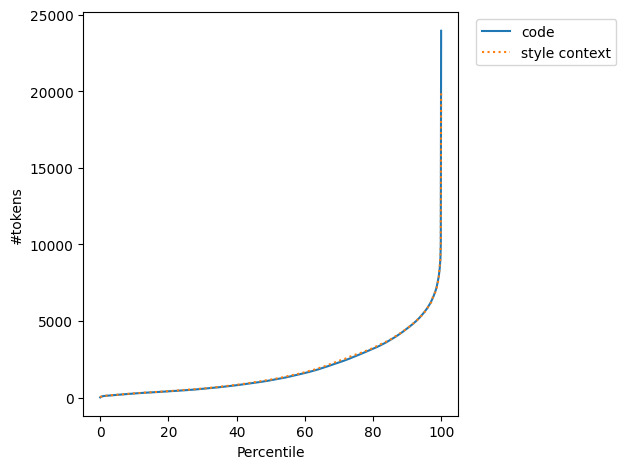


##########

dataset 1
code_tokens_counts                    0
count  182184.000000
mean     1840.463581
std      1808.567170
min        14.000000
25%       484.000000
50%      1127.000000
75%      2724.000000
max     23173.000000
style_context_tokens_counts                    0
count  182184.000000
mean     1806.201977
std      1766.020705
min        22.000000
25%       478.000000
50%      1114.000000
75%      2703.000000
max     21100.000000


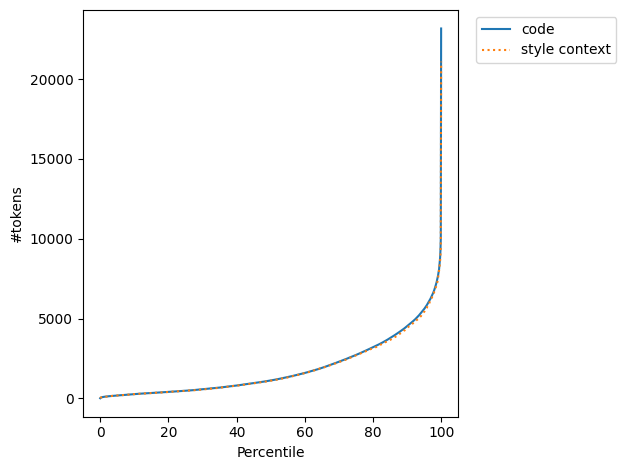


##########



In [9]:
def calc_token_lengths(sample):
    return {
        "code_tokens_counts": len(sample["code_tokenized"]),
        "style_context_tokens_counts": len(sample["style_context_tokenized"])
    }

for i, dataset in enumerate(tokenized_datasets):
    d_temp = dataset.map(calc_token_lengths, num_proc=os.cpu_count())
    
    code_tokens_counts = d_temp["train"]["code_tokens_counts"] + d_temp["test"]["code_tokens_counts"]
    
    style_context_tokens_counts = d_temp["train"]["style_context_tokens_counts"] + d_temp["test"]["style_context_tokens_counts"]

    print("dataset", i)
    print("code_tokens_counts", pd.DataFrame(code_tokens_counts).describe())
    print("style_context_tokens_counts", pd.DataFrame(style_context_tokens_counts).describe())

    plot_percentiles([code_tokens_counts, style_context_tokens_counts], ["code", "style context"], "#tokens")

    print("\n" + "#" * 10 + "\n")

In [10]:
import pickle

with open("test_data/ngrams_per_dataset.pkl", "rb") as f:
    n_grams = pickle.load(f)

In [11]:
top_most_frequent = 80
top_most_least = 80

for i, n_grams_info in enumerate(n_grams):
    print("dataset", i)

    print("code")
    for n, gram in enumerate(n_grams_info[0]):
        gram_frequencies = sorted(gram.items(), key=lambda v: v[1])

        print(f"\t{n+1}-gram: {len(gram_frequencies)} total")
        print(f"\t\ttop {top_most_frequent} most frequent tokens")
        for token, freq in list(reversed(gram_frequencies))[:top_most_frequent]:
            if type(token) == str:
                t = token.encode("utf-8")
            else:
                t = token
            print("\t\t\t", t, freq)
        print(f"\t\ttop {top_most_least} least frequent tokens")
        for token, freq in gram_frequencies[:top_most_least]:
            if type(token) == str:
                t = token.encode("utf-8")
            else:
                t = token
            print("\t\t\t", t, freq)

    print("style context")
    for n, gram in enumerate(n_grams_info[1]):
        gram_frequencies = sorted(gram.items(), key=lambda v: v[1])

        print(f"\t{n+1}-gram: {len(gram_frequencies)} total")
        print(f"\t\ttop {top_most_frequent} most frequent tokens")
        for token, freq in list(reversed(gram_frequencies))[:top_most_frequent]:
            if type(token) == str:
                t = token.encode("utf-8")
            else:
                t = token
            print("\t\t\t", t, freq)
        print(f"\t\ttop {top_most_least} least frequent tokens")
        for token, freq in gram_frequencies[:top_most_least]:
            if type(token) == str:
                t = token.encode("utf-8")
            else:
                t = token
            print("\t\t\t", t, freq)
    
    print("\n" + "#" * 20 + "\n")

dataset 0
code
	1-gram: 130 total
		top 80 most frequent tokens
			 b'<SPACE1>' 37406074
			 b'<SPACE4>' 24008897
			 b'\r' 20716354
			 b'\n' 19663426
			 b'<TAB4>' 19422547
			 b'<SPACE2>' 18831569
			 b'<LOWERCASE>' 18732650
			 b'<TAB2>' 18312934
			 b'<TAB1>' 18017686
			 b',' 11926356
			 b'<SNAKE_CASE>' 9529809
			 b')' 8792347
			 b'(' 8792347
			 b':' 8163690
			 b'.' 7921185
			 b'=' 7820334
			 b'<UPPER_CAMEL_CASE>' 7259721
			 b'<INT>' 6285773
			 b'<STRING>' 5632002
			 b']' 4449106
			 b'[' 4449106
			 b'"' 3322686
			 b"'''" 3149880
			 b'"""' 2717714
			 b'<SINGLE_LEADING_UNDERSCORE_NAME>' 2606005
			 b'<DOUBLE_LEADING_UNDERSCORE_NAME>' 2437625
			 b'<DOUBLE_TRAILING_UNDERSCORE_NAME>' 2399882
			 b'<SINGLE_TRAILING_UNDERSCORE_NAME>' 2335426
			 b"'" 2199524
			 b'<LETTER_LOW>' 2073432
			 b'<UPPER_CAMEL_CASE2>' 1834020
			 b'<LOWER_CAMEL_CASE>' 1733485
			 b'<SCREAMING_SNAKE_CASE>' 1518884
			 b'<NUMBER_UNDERSCORE>' 1383100
			 b'<LOWER_CAMEL_CASE2>' 1375558
			 b'<LETT

Overall most frequent tokens/n-grams:

In [12]:
from collections import defaultdict

top_most_frequent = 50
top_most_least = 50

all_n_grams = [defaultdict(int) for _ in  range(3)]

total_samples_count = sum([dataset["train"].num_rows + dataset["test"].num_rows for dataset in code_datasets])

for n_grams_info in n_grams:
    for n, gram in enumerate(n_grams_info[0]):
        for k, v in gram.items():
            all_n_grams[n][k] += v
    for n, gram in enumerate(n_grams_info[1]):
        for k, v in gram.items():
            all_n_grams[n][k] += v

for n, grams in enumerate(all_n_grams):
        gram_frequencies = sorted(grams.items(), key=lambda v: v[1])

        print(f"{n+1}-gram:")
        for n in range(0, total_samples_count // 100 * 6, total_samples_count // 100):
            print(f"\tlen with minimum {n} occurences ({n / (total_samples_count // 100)}%): {len(list(filter(lambda v: v[1] >= n, gram_frequencies)))}")

        print(f"\ttop {top_most_frequent} most frequent tokens")
        for token, freq in list(reversed(gram_frequencies))[:top_most_frequent]:
            if type(token) == str:
                t = token.encode("utf-8")
            else:
                t = token
            print("\t\t", t, freq)
        print(f"\ttop {top_most_least} least frequent tokens")
        for token, freq in gram_frequencies[:top_most_least]:
            if type(token) == str:
                t = token.encode("utf-8")
            else:
                t = token
            print("\t\t", t, freq)

1-gram:
	len with minimum 0 occurences (0.0%): 130
	len with minimum 3643 occurences (1.0%): 113
	len with minimum 7286 occurences (2.0%): 108
	len with minimum 10929 occurences (3.0%): 104
	len with minimum 14572 occurences (4.0%): 103
	len with minimum 18215 occurences (5.0%): 102
	top 50 most frequent tokens
		 b'<SPACE1>' 149941113
		 b'<SPACE4>' 96646159
		 b'\r' 81378500
		 b'\n' 80241930
		 b'<TAB4>' 77410437
		 b'<SPACE2>' 75844918
		 b'<LOWERCASE>' 74922508
		 b'<TAB2>' 74075597
		 b'<TAB1>' 72636828
		 b',' 47690956
		 b'<SNAKE_CASE>' 38320953
		 b')' 35036478
		 b'(' 35036478
		 b':' 32806689
		 b'.' 31651054
		 b'=' 31332752
		 b'<UPPER_CAMEL_CASE>' 29121538
		 b'<INT>' 25106486
		 b'<STRING>' 22413263
		 b']' 17826595
		 b'[' 17826595
		 b'"' 13062124
		 b"'''" 12505408
		 b'"""' 11100720
		 b'<SINGLE_LEADING_UNDERSCORE_NAME>' 10637859
		 b'<DOUBLE_LEADING_UNDERSCORE_NAME>' 9486894
		 b'<DOUBLE_TRAILING_UNDERSCORE_NAME>' 9444472
		 b'<SINGLE_TRAILING_UNDERSCORE_NAME>' 9302

## Feature Quality

In [ ]:
import pickle

from collections import defaultdict

def get_all_n_grams(path, min_occurences=None):
    with open(path, "rb") as f:
        n_grams_per_dataset = pickle.load(f)

    n_grams_with_counts = [defaultdict(int) for _ in range(len(n_grams_per_dataset[0][0]))]
    
    for dataset_n_grams in n_grams_per_dataset:
        for n_grams_info in dataset_n_grams:
            for k, v in n_grams_info[0].items():
                n_grams_with_counts[0][k] += v
            for k, v in n_grams_info[1].items():
                n_grams_with_counts[1][k] += v
            for k, v in n_grams_info[2].items():
                n_grams_with_counts[2][k] += v

    all_n_grams = []
    for n, n_grams_info in enumerate(n_grams_with_counts):
        all_n_grams.append((f"{n+1}-gram" , [k if isinstance(k, tuple) else (k,) for k in n_grams_info.keys()]))

        if min_occurences is not None:
            filtered_n_grams = [n_gram if isinstance(n_gram, tuple) else (n_gram,) for n_gram, count in filter(lambda v: v[1] >= min_occurences, n_grams_info.items())]
            all_n_grams.append((f"{n+1}-gram min {min_occurences}" , filtered_n_grams))

    return all_n_grams

In [3]:
from tqdm import tqdm
import networkx as nx
from itertools import product, starmap, chain, zip_longest
from functools import partial

def get_root_to_leaf_nodes(G):
    roots = (v for v, d in G.in_degree() if d == 0)
    leaves = (v for v, d in G.out_degree() if d == 0)
    all_paths = partial(nx.all_simple_paths, G)

    return list(chain.from_iterable(starmap(all_paths, product(roots, leaves))))

def calc_tree_similarity(tree1, tree2):
    leaf_paths_tree1 = get_root_to_leaf_nodes(tree1)
    leaf_paths_tree2 = get_root_to_leaf_nodes(tree2)
    classes_tree1 = nx.get_node_attributes(tree1, "class")
    classes_tree2 = nx.get_node_attributes(tree2, "class")

    best_path_scores = np.zeros((len(leaf_paths_tree1), len(leaf_paths_tree2)))

    for i, path1 in enumerate(leaf_paths_tree1):
        for j, path2 in enumerate(leaf_paths_tree2):
            nodes_matched = 0
            for n1, n2 in zip_longest(path1, path2, fillvalue=None):
                if classes_tree1.get(n1, None) == classes_tree2.get(n2, None):
                    nodes_matched += 1

            path_score = nodes_matched / max(len(path1), len(path2))
            if np.max(best_path_scores[i]) < path_score and np.max(best_path_scores[:,j]) < path_score:
                best_path_scores[i][j] = path_score

    return np.sum(best_path_scores) / ((best_path_scores.shape[0] + best_path_scores.shape[1]) / 2)

In [ ]:
from collections import defaultdict, deque
from itertools import islice

def count_n_gram_occurences(tokens, n_grams):
    n_grams_ranges = set([len(gram) for gram in n_grams])
    counts = defaultdict(int)

    # only save max n items, where n is the max of n_gram len
    buffer = deque(maxlen=max(n_grams_ranges))

    # count all n-grams with a sliding windows
    for i, t in enumerate(tokens):
        buffer.append(t)
        for n in n_grams_ranges:
            n_gram = list(islice(buffer, 0, n))
            if len(n_gram) == n:
                counts[tuple(n_gram)] += 1
    
    return np.array([counts.get(gram, 0) for gram in n_grams])

### Single code with random codestyles

Test the quality of the features by checking the ability to generate features to distinct a single sample code which is formatted with random codestyles.

In [4]:
from learning_to_style_check.codestyle import SAMPLE_CODE

print(SAMPLE_CODE)


"""
This is a module docstring
"""

import os
import sys

TEST_VAR = 42
var2 = 'test string'
TEST_VAR2 = f"test {TEST_VAR} {' ' * 2}"
TEST_VAR2 = rb"test ' test"

test("""test string""")
call(f"test {TEST_VAR} {' ' * 2}")


class Foo:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def bar(self, c, d):
        """
        This is a method docstring
        """
        return self.a + self.b + c + d


def test(e, f):
    return e + f


def test2(g):
    """
    This is a function docstring
    """
    m = 42
    n = "test string"
    return g + "test string"



In [5]:
from learning_to_style_check.codestyle import get_random_codestyle

codestyles = set()
while len(codestyles) < 100:
    codestyles.add(get_random_codestyle(seed=len(codestyles)))

In [6]:
from multiprocessing import Pool
from itertools import repeat
from learning_to_style_check.codestyle import apply_codestyle

with Pool() as p:
    styled_codes = p.starmap(apply_codestyle, zip(repeat(SAMPLE_CODE), codestyles))

In [7]:
print(styled_codes[0])

						return g + "test string"ring"  ->  Dict:					str  )       ->  Optional[Any]:					Optional[Any]  )       ->  List[Any]:


In [8]:
print(styled_codes[1])






import os
import sys

lowerCAmelCase__   						=  42
lowerCAmelCase__   						=  "test string"
lowerCAmelCase__   						=  f'''test {TEST_VAR} {" " * 2}'''
lowerCAmelCase__   						=  Rb"test ' test"

test("test string")
call(f'''test {TEST_VAR} {" " * 2}''')
class lowerCAmelCase__						:
					def __init__(self						,lowerCAmelCase__						,lowerCAmelCase__						)  ->						Tuple:
										lowerCAmelCase__   						=  a
										lowerCAmelCase__   						=  b





					def lowerCAmelCase__						(self						,lowerCAmelCase__						,lowerCAmelCase__						)  ->						List[str]:
										return self.a + self.b + c + d





def lowerCAmelCase__						(lowerCAmelCase__						,lowerCAmelCase__						)  ->						Optional[int]:
					return e + f





def lowerCAmelCase__						(lowerCAmelCase__						)  ->						str:
					lowerCAmelCase__   						=  42
					lowerCAmelCase__   						=  "test string"
					return g + "test string"


#### BoW

In [ ]:
from learning_to_style_check.features import tokenize

tokenized_style_codes = [tokenize(code) for code in styled_codes]

In [ ]:
all_n_grams = get_all_n_grams("test_data/ngrams_per_dataset.pkl", min_occurences=182_191)

1-gram len 130
	average 0.6697362340201918
	min 0.1555022670713668
	max 0.9763995461937838
	std 0.15738723151109044


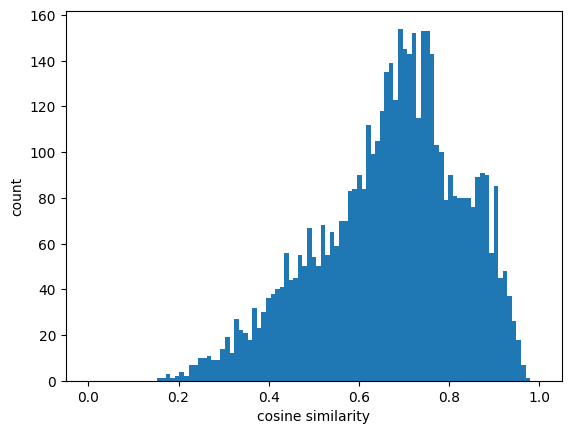

1-gram min 182191 len 82
	average 0.6697362340201918
	min 0.1555022670713668
	max 0.9763995461937838
	std 0.15738723151109044


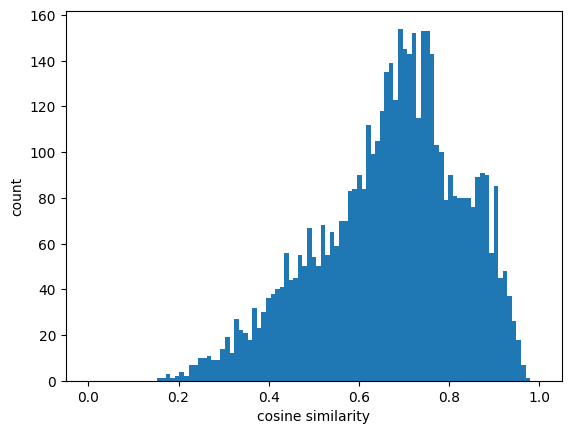

2-gram len 1580
	average 0.3075293313373612
	min 0.01935489748675108
	max 0.9490854125789104
	std 0.24668966691621125


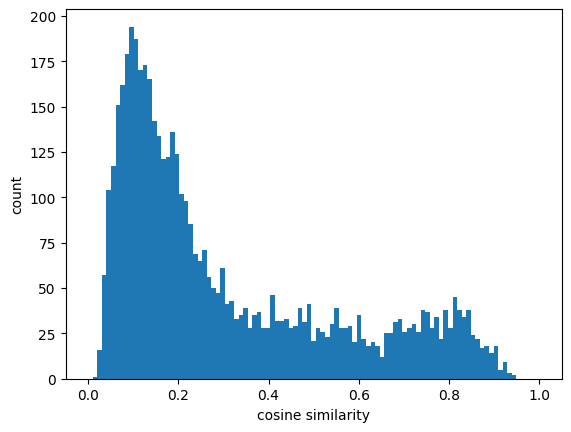

2-gram min 182191 len 642
	average 0.30842938489880023
	min 0.01795088709558254
	max 0.9507295962791751
	std 0.24802912418561723


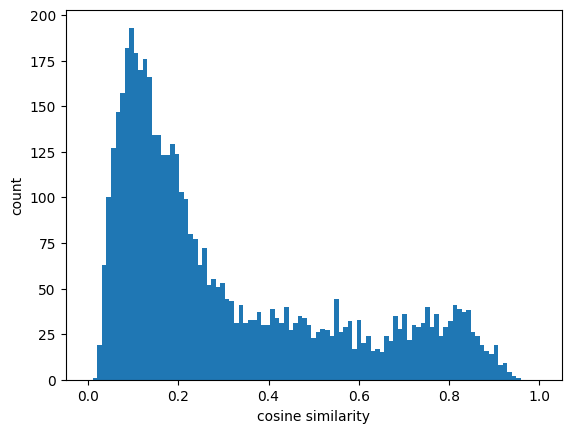

3-gram len 16220
	average 0.20949432923313888
	min 0.012140820556155393
	max 0.9386206142720467
	std 0.23726548349927112


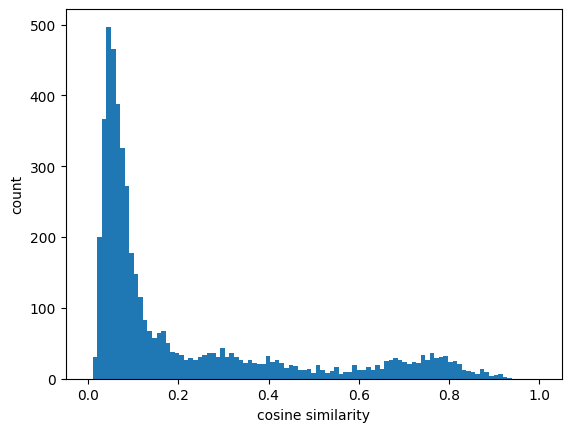

3-gram min 182191 len 1322
	average 0.22509327266177745
	min 0.010076238512185538
	max 0.9564184528263601
	std 0.2544578920662104


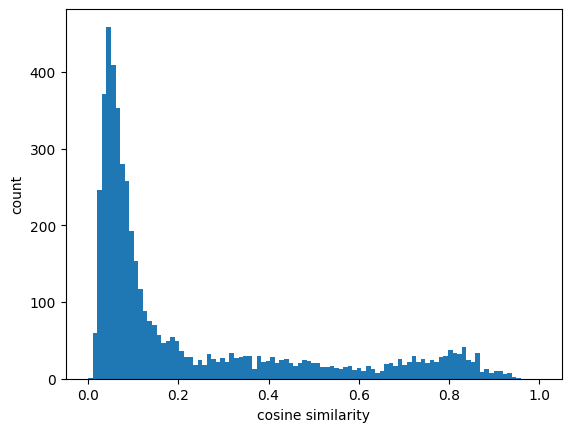

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


for n_grams_name, n_grams in all_n_grams:
    print(f"{n_grams_name} len {len(n_grams)}")

    sims = cosine_similarity([count_n_gram_occurences(code, n_grams) for code in tokenized_style_codes])
    sims = sims[np.triu_indices(sims.shape[0], k=1)]
    
    print("\taverage", np.average(sims))
    print("\tmin", np.min(sims))
    print("\tmax", np.max(sims))
    print("\tstd", np.std(sims))

    plt.hist(sims, np.linspace(0, 1, 100), fill=True)
    plt.ylabel("count")
    plt.xlabel("cosine similarity")
    plt.plot()
    plt.show()

#### Style Tree

In [ ]:
from learning_to_style_check.features import get_style_tree, convert_style_tree_to_dgl_graph

style_trees = [convert_style_tree_to_dgl_graph(get_style_tree(code)).to_networkx() for code in styled_codes]

In [ ]:
from itertools import combinations

from tqdm.contrib.concurrent import process_map

style_tree_tuples = list(combinations(style_trees, 2))

def calc_tree_similarity_mp(trees):
    return calc_tree_similarity(*trees)

tree_distances = process_map(calc_tree_similarity_mp, style_tree_tuples, max_workers=os.cpu_count(), chunksize=1)

clear_output()

In [63]:
np.average(tree_distances)

0.9011787601213174

In [64]:
np.min(tree_distances)

0.5829457364341085

In [65]:
np.max(tree_distances)

1.0

In [66]:
np.std(tree_distances)

0.07291387459557586

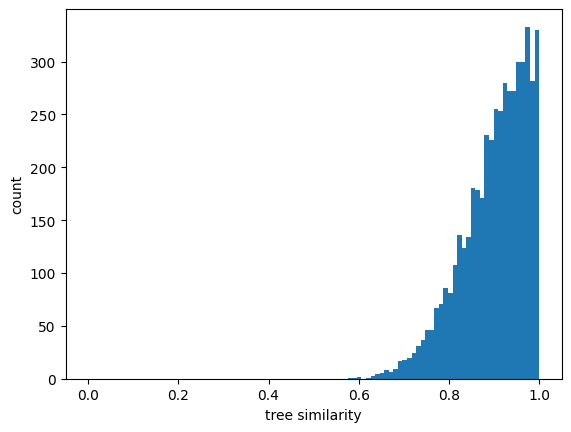

In [67]:
plt.hist(tree_distances, np.linspace(0, 1, 100), fill=True)
plt.ylabel("count")
plt.xlabel("tree similarity")
plt.plot()
plt.show()

### Single code with single mutated codestyles

Test the quality of the features by checking the ability to generate features to distinct a single sample code which is formatted with random codestyles.

In [10]:
from learning_to_style_check.codestyle import SAMPLE_CODE

print(SAMPLE_CODE)


"""
This is a module docstring
"""

import os
import sys

TEST_VAR = 42
var2 = 'test string'
TEST_VAR2 = f"test {TEST_VAR} {' ' * 2}"
TEST_VAR2 = rb"test ' test"

test("""test string""")
call(f"test {TEST_VAR} {' ' * 2}")


class Foo:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def bar(self, c, d):
        """
        This is a method docstring
        """
        return self.a + self.b + c + d


def test(e, f):
    return e + f


def test2(g):
    """
    This is a function docstring
    """
    m = 42
    n = "test string"
    return g + "test string"



In [11]:
from learning_to_style_check.codestyle import get_random_codestyle, mutate_codestyle

base_random_codestyle = get_random_codestyle(seed=41)
codestyles = set([base_random_codestyle])

while len(codestyles) < 100:
    codestyles.add(mutate_codestyle(base_random_codestyle))

In [12]:
from multiprocessing import Pool
from itertools import repeat
from learning_to_style_check.codestyle import apply_codestyle

with Pool() as p:
    styled_codes = p.starmap(apply_codestyle, zip(repeat(SAMPLE_CODE), codestyles))

In [13]:
print(styled_codes[0])






import os
import sys

_snake_case     						=	42
_snake_case     						=	'''test string'''
_snake_case     						=	f'''test {TEST_VAR} {" " * 2}'''
_snake_case     						=	Rb'''test \' test'''

test('''test string''')
call(f'''test {TEST_VAR} {" " * 2}''')






class 				_lowerCAmelCase						:






		def __init__(				self     :	Any						,				_lowerCAmelCase     :	List[str]						,				_lowerCAmelCase     :	Any						)			->	Dict:
				_lowerCAmelCase     						=	a
				_lowerCAmelCase     						=	b






		def 				_lowerCAmelCase						(				self     :	Dict						,				_lowerCAmelCase     :	Optional[Any]						,				_lowerCAmelCase     :	Dict						)			->	Optional[int]:
				return self.a + self.b + c + d






def 				_lowerCAmelCase						(				_lowerCAmelCase     :	Any						,				_lowerCAmelCase     :	List[Any]						)			->	Dict:
		return e + f






def 				_lowerCAmelCase						(				_lowerCAmelCase     :	Optional[int]						)			->	List[str]:
		_lowerCAmelCase     						=	42
		_lowerCAmelCase  

In [14]:
print(styled_codes[1])

		return g + "test string"		=	'''test string'''se     :	Any						)			->	List[Any]:CAmelCase     :	List[Any]						)			->	Optional[int]:						)			->	Optional[int]:


#### BoW

In [ ]:
from learning_to_style_check.features import tokenize

tokenized_style_codes = [tokenize(code) for code in styled_codes]

In [ ]:
all_n_grams = get_all_n_grams("test_data/ngrams_per_dataset.pkl", min_occurences=182_191)

1-gram len 130
	average 0.9923627237168837
	min 0.6949756216158985
	max 1.0000000000000002
	std 0.025019094476894925


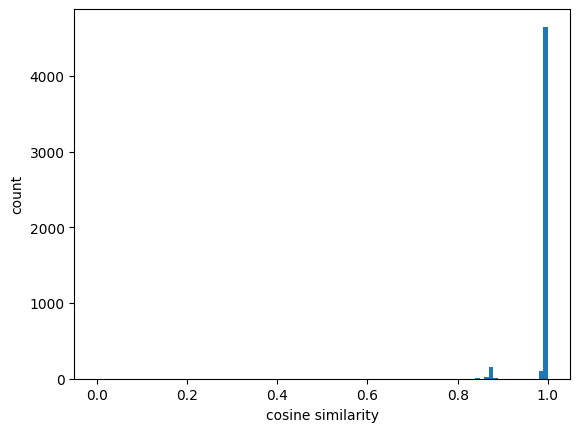

1-gram min 182191 len 82
	average 0.9923627237168837
	min 0.6949756216158985
	max 1.0000000000000002
	std 0.025019094476894925


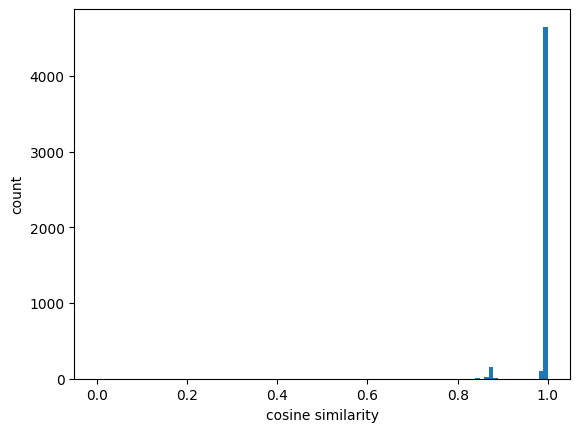

2-gram len 1580
	average 0.971529660889032
	min 0.40001845793754676
	max 0.9997334843567933
	std 0.10498791620283679


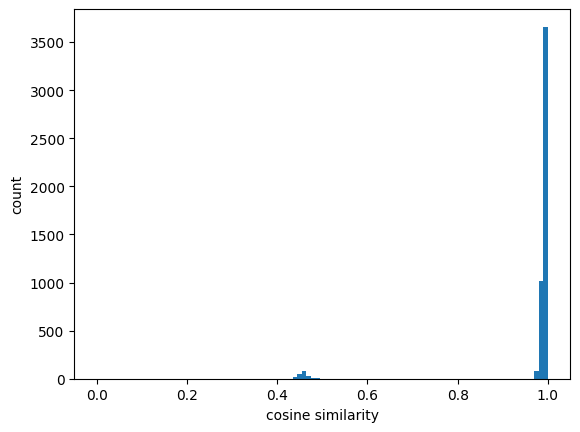

2-gram min 182191 len 642
	average 0.9716111008090459
	min 0.39955892837110873
	max 0.9997320202303678
	std 0.10510692448924172


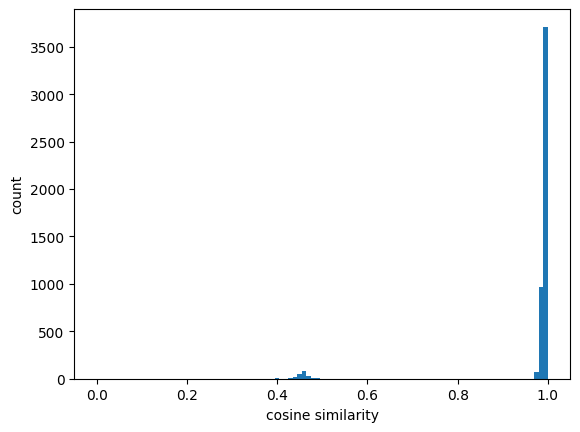

3-gram len 16220
	average 0.9650114550297552
	min 0.4038814760653393
	max 0.9993157662421929
	std 0.10124979122276535


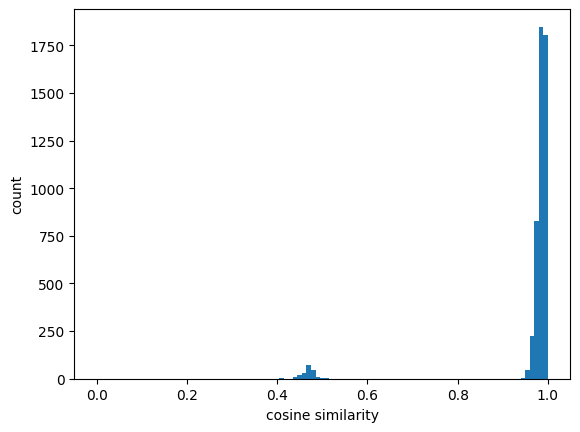

3-gram min 182191 len 1322
	average 0.965408947845155
	min 0.36691017728422715
	max 0.9997084672635684
	std 0.108828431496666


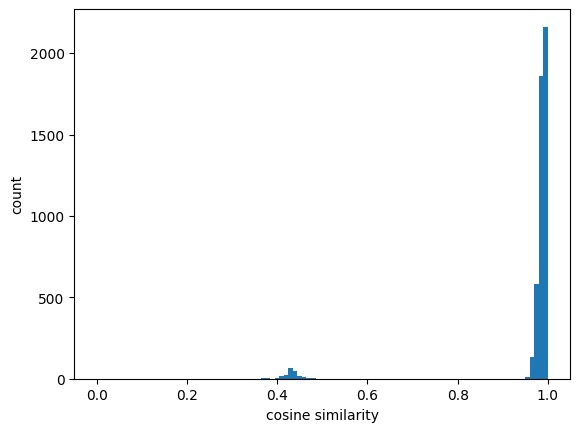

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


for n_grams_name, n_grams in all_n_grams:
    print(f"{n_grams_name} len {len(n_grams)}")
    
    sims = cosine_similarity([count_n_gram_occurences(code, n_grams) for code in tokenized_style_codes])
    sims = sims[np.triu_indices(sims.shape[0], k=1)]
    
    print("\taverage", np.average(sims))
    print("\tmin", np.min(sims))
    print("\tmax", np.max(sims))
    print("\tstd", np.std(sims))

    plt.hist(sims, np.linspace(0, 1, 100), fill=True)
    plt.ylabel("count")
    plt.xlabel("cosine similarity")
    plt.plot()
    plt.show()

#### Style Tree

In [76]:
from learning_to_style_check.features import get_style_tree, convert_style_tree_to_dgl_graph

style_trees = [convert_style_tree_to_dgl_graph(get_style_tree(code)).to_networkx() for code in styled_codes]

In [77]:
from itertools import combinations

from tqdm.contrib.concurrent import process_map

style_tree_tuples = list(combinations(style_trees, 2))

def calc_tree_similarity_mp(trees):
    return calc_tree_similarity(*trees)

tree_distances = process_map(calc_tree_similarity_mp, style_tree_tuples, max_workers=os.cpu_count(), chunksize=1)

clear_output()

In [78]:
np.average(tree_distances)

0.9904264459786706

In [79]:
np.min(tree_distances)

0.928125

In [80]:
np.max(tree_distances)

1.0

In [81]:
np.std(tree_distances)

0.009501202061034863

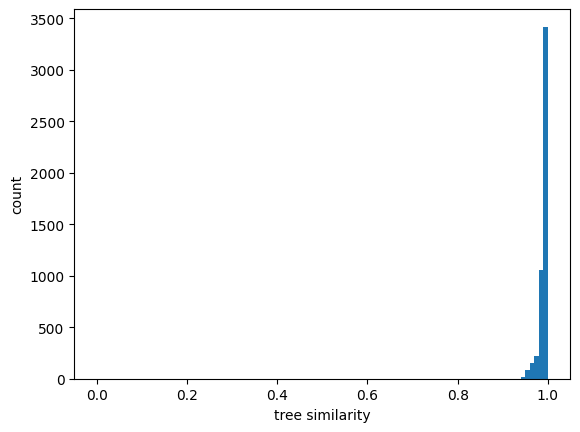

In [82]:
plt.hist(tree_distances, np.linspace(0, 1, 100), fill=True)
plt.ylabel("count")
plt.xlabel("tree similarity")
plt.plot()
plt.show()

### Dataset codes with different Codestyles

#### BoW over all samples

In [ ]:
all_n_grams = get_all_n_grams("test_data/ngrams_per_dataset.pkl", min_occurences=346_162)

In [ ]:
from scipy.spatial.distance import cosine

def calc_cosine_sim(sample, n_grams):
    return {
        "cosine_sim": 1 - cosine(count_n_gram_occurences(sample["code_tokenized"], n_grams), count_n_gram_occurences(sample["style_context_tokenized"], n_grams))
    }

for i, dataset in enumerate(tokenized_datasets):
    print(f"dataset {i}")
    n_gram_smis = []

    for n_grams_name, n_grams in all_n_grams:
        print(f"{n_grams_name} len {len(n_grams)}")
    
        dataset = dataset.map(calc_cosine_sim, fn_kwargs={"n_grams": n_grams}, num_proc=os.cpu_count())
        negative_samples = dataset.filter(lambda s: s["label"] == 0, num_proc=os.cpu_count())
        negative_samples_cosine_sim = negative_samples["train"]["cosine_sim"] + negative_samples["test"]["cosine_sim"]
        positive_samples = dataset.filter(lambda s: s["label"] == 1, num_proc=os.cpu_count())
        positive_samples_cosine_sim = positive_samples["train"]["cosine_sim"] + positive_samples["test"]["cosine_sim"]
        
        print("\tmetric", "0", "1")
        print("\taverage", np.average(negative_samples_cosine_sim), np.average(positive_samples_cosine_sim))
        print("\tmin", np.min(negative_samples_cosine_sim), np.min(positive_samples_cosine_sim))
        print("\tmax", np.max(negative_samples_cosine_sim), np.max(positive_samples_cosine_sim))
        print("\tstd", np.std(negative_samples_cosine_sim), np.std(positive_samples_cosine_sim))

        plt.hist([negative_samples_cosine_sim, positive_samples_cosine_sim], np.linspace(0, 1, 100), fill=True)
        plt.ylabel("count")
        plt.xlabel("cosine similarity")
        plt.plot()
        plt.show()

    print("\n" + "#" * 20 + "\n")

#### BoW over random selected samples

In [ ]:
all_n_grams = get_all_n_grams("test_data/ngrams_per_dataset.pkl", min_occurences=346_162)

dataset 0
1-gram len 130


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.7022675854077997 0.8681030685707141
	min 0.08587118355788881 0.389218891034522
	max 0.9633758897114542 1.0
	std 0.13134728883523716 0.09957474541355033


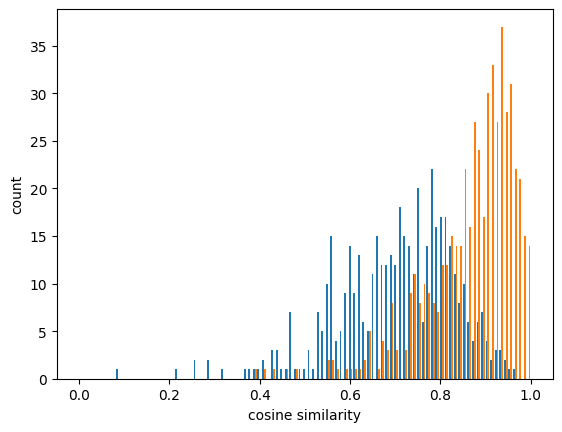

1-gram min 182191 len 82


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.7023612481733774 0.868195965283877
	min 0.08587118355788881 0.3892188910345219
	max 0.9633933784278169 1.0
	std 0.13140783591064803 0.09952173044796622


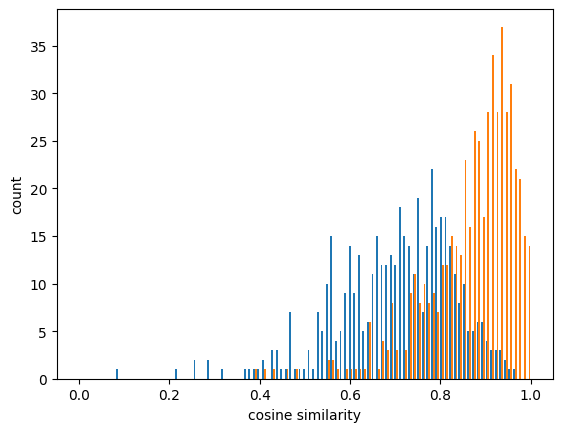

2-gram len 1580


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.3058619452284055 0.6495858250667995
	min 0.019216708378642533 0.044286290004145634
	max 0.8445193997406685 1.0
	std 0.1740347080586342 0.226112194401986


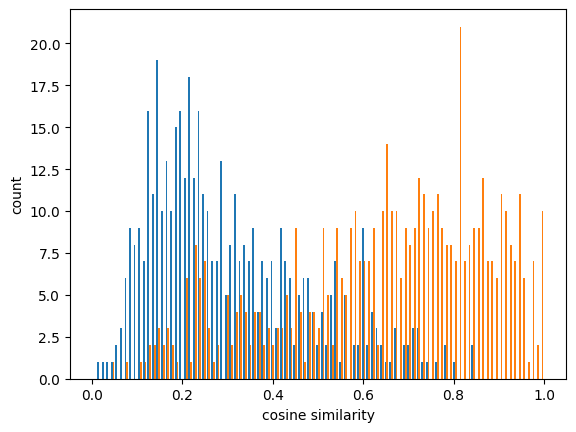

2-gram min 182191 len 642


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.30778698772749674 0.6526351909423846
	min 0.019587697443185004 0.04440897221837947
	max 0.8463707573151275 1.0
	std 0.17480387246883644 0.2258040054702255


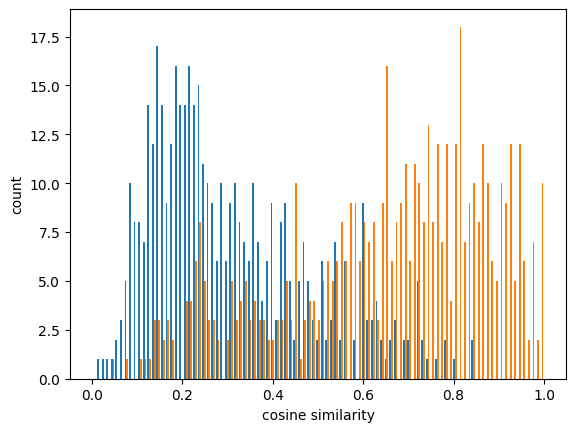

3-gram len 16220


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.13707934734272292 0.493456220295322
	min 0.0019300835392644933 0.00479762749872481
	max 0.7119118350583932 1.0
	std 0.1298127011828369 0.2665792861183717


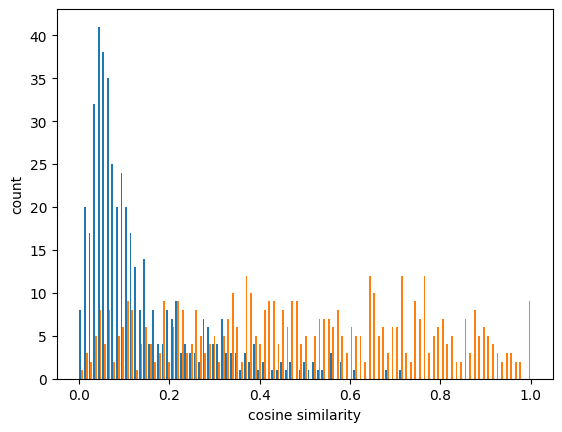

3-gram min 182191 len 1322


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.1514080584360195 0.5149844455645803
	min 0.0021873662141519423 0.00492834088151628
	max 0.7441066457247862 1.0
	std 0.1407914863768205 0.2678026081208074


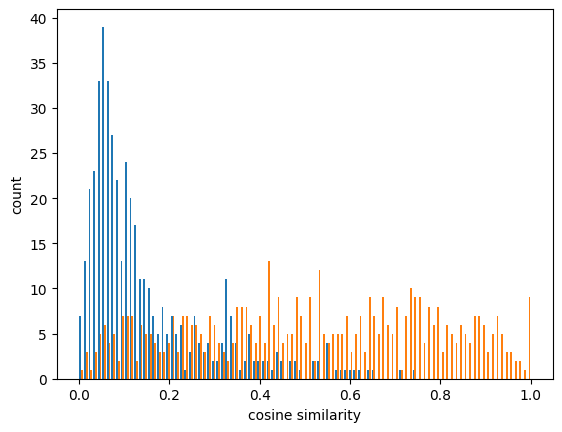


####################

dataset 1
1-gram len 130


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.8369721060315563 0.8688555439778126
	min 0.2990468957877066 0.3922801968975407
	max 0.9933153345664275 1.0
	std 0.11704123067624271 0.10093615463654851


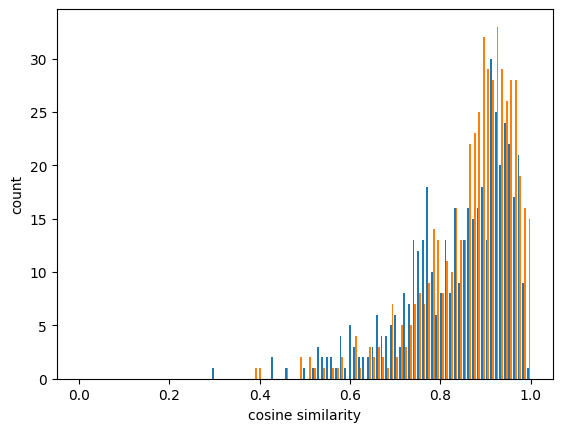

1-gram min 182191 len 82


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.8370863007516445 0.868952380431902
	min 0.2990501645956619 0.3922801968975407
	max 0.9933153345664275 1.0
	std 0.11704110123775426 0.10092793135605084


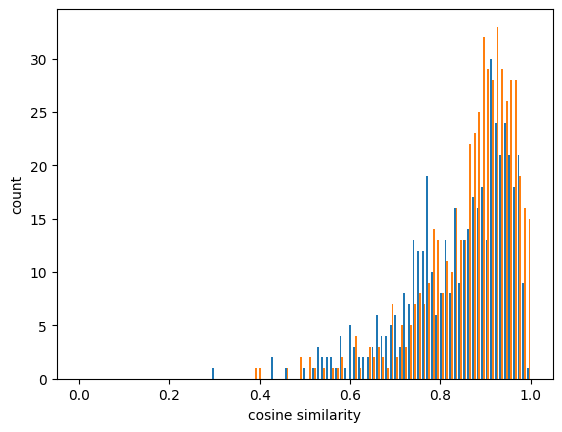

2-gram len 1580


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.6297279274514127 0.6971275421376318
	min 0.08887336992365369 0.0873531161314618
	max 0.978803475194349 1.0
	std 0.22239186972731356 0.1931386904694064


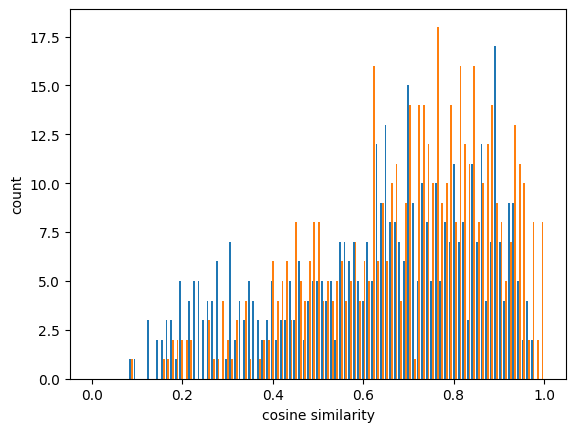

2-gram min 182191 len 642


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.6325048611494679 0.7001357934609544
	min 0.08942357357294173 0.08839763688252722
	max 0.9793050293960754 1.0
	std 0.22245107004942302 0.19266052140216275


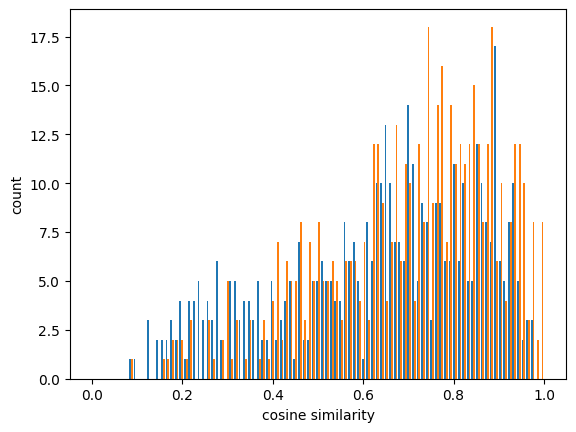

3-gram len 16220


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.4775140040478957 0.5385046074340416
	min 0.010749378509208096 0.010439207888998436
	max 0.9664558444977963 1.0
	std 0.2472575383450597 0.2460379302398831


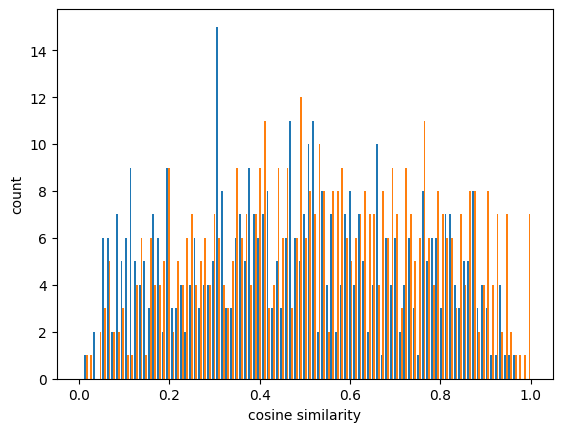

3-gram min 182191 len 1322


Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

	metric 0 1
	average 0.4984647269229239 0.561251921235008
	min 0.010357636610723753 0.01222049598146735
	max 0.9754472669777255 1.0
	std 0.2526676356952171 0.2479584375088591


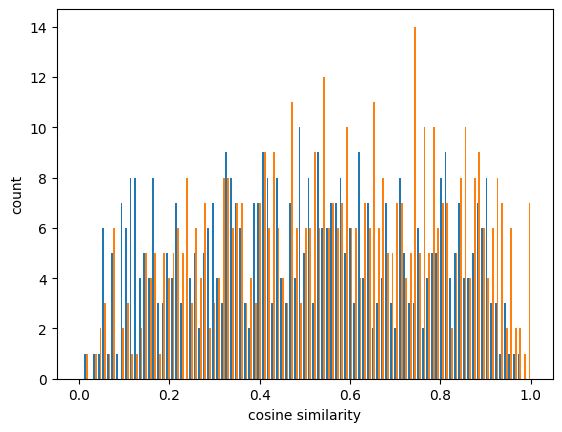


####################



In [17]:
from scipy.spatial.distance import cosine

def calc_cosine_sim(sample, n_grams):
    return {
        "cosine_sim": 1 - cosine(count_n_gram_occurences(sample["code_tokenized"], n_grams), count_n_gram_occurences(sample["style_context_tokenized"], n_grams))
    }

for i, dataset in enumerate(tokenized_datasets):
    print(f"dataset {i}")
    n_gram_smis = []

    for n_grams_name, n_grams in all_n_grams:
        print(f"{n_grams_name} len {len(n_grams)}")
        
        dataset = dataset.shuffle(42)
        dataset["train"] = dataset["train"].select(range(700))
        dataset["test"] = dataset["test"].select(range(300))

        dataset = dataset.map(calc_cosine_sim, fn_kwargs={"n_grams": n_grams}, num_proc=os.cpu_count())
        negative_samples = dataset.filter(lambda s: s["label"] == 0, num_proc=os.cpu_count())
        negative_samples_cosine_sim = negative_samples["train"]["cosine_sim"] + negative_samples["test"]["cosine_sim"]
        positive_samples = dataset.filter(lambda s: s["label"] == 1, num_proc=os.cpu_count())
        positive_samples_cosine_sim = positive_samples["train"]["cosine_sim"] + positive_samples["test"]["cosine_sim"]
        
        print("\tmetric", "0", "1")
        print("\taverage", np.average(negative_samples_cosine_sim), np.average(positive_samples_cosine_sim))
        print("\tmin", np.min(negative_samples_cosine_sim), np.min(positive_samples_cosine_sim))
        print("\tmax", np.max(negative_samples_cosine_sim), np.max(positive_samples_cosine_sim))
        print("\tstd", np.std(negative_samples_cosine_sim), np.std(positive_samples_cosine_sim))

        plt.hist([negative_samples_cosine_sim, positive_samples_cosine_sim], np.linspace(0, 1, 100), fill=True)
        plt.ylabel("count")
        plt.xlabel("cosine similarity")
        plt.plot()
        plt.show()

    print("\n" + "#" * 20 + "\n")

#### Style Tree over random selected samples

dataset 0
	metric 0 1
	average 0.537438 0.52504104
	min tensor(0.0207) tensor(0.0307)
	max tensor(0.9982) tensor(1.)
	std tensor(0.2806) tensor(0.2731)


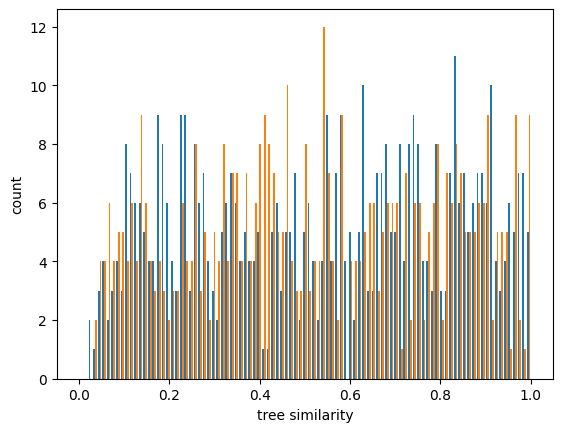


####################

dataset 1


Map (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Map (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/300 [00:00<?, ? examples/s]

Filter (num_proc=6):   0%|          | 0/700 [00:00<?, ? examples/s]

	metric 0 1
	average 0.53251773 0.52522355
	min tensor(0.0165) tensor(0.0165)
	max tensor(1.) tensor(1.)
	std tensor(0.2789) tensor(0.2795)


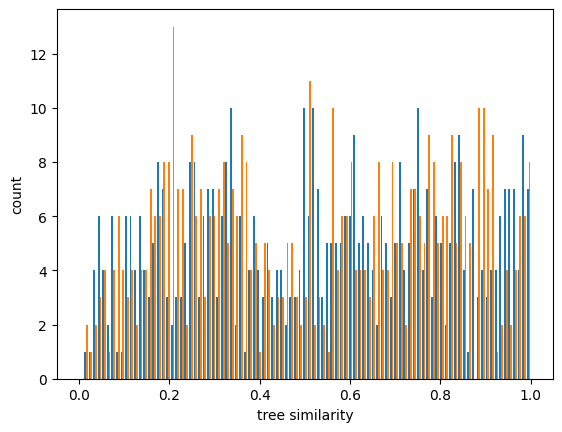


####################



In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from train import get_graphs

def get_tree_similarity(sample):
    tree1, tree2 = get_graphs(sample)
    
    return {
        "tree_similarity": calc_tree_similarity(tree1.to_networkx(), tree2.to_networkx())
    }

for i, dataset in enumerate(graph_datasets):
    print(f"dataset {i}")

    dataset = dataset.shuffle(42)
    dataset["train"] = dataset["train"].select(range(700))
    dataset["test"] = dataset["test"].select(range(300))

    dataset = dataset.map(get_tree_similarity, num_proc=os.cpu_count())

    negative_samples = dataset.filter(lambda s: s["label"] == 0, num_proc=os.cpu_count())
    negative_samples_cosine_sim = torch.cat((negative_samples["train"]["tree_similarity"], negative_samples["test"]["tree_similarity"]))
    positive_samples = dataset.filter(lambda s: s["label"] == 1, num_proc=os.cpu_count())
    positive_samples_cosine_sim = torch.cat((positive_samples["train"]["tree_similarity"], positive_samples["test"]["tree_similarity"]))
        
    print("\tmetric", "0", "1")
    print("\taverage", np.average(negative_samples_cosine_sim), np.average(positive_samples_cosine_sim))
    print("\tmin", torch.min(negative_samples_cosine_sim), torch.min(positive_samples_cosine_sim))
    print("\tmax", torch.max(negative_samples_cosine_sim), torch.max(positive_samples_cosine_sim))
    print("\tstd", torch.std(negative_samples_cosine_sim), torch.std(positive_samples_cosine_sim))

    plt.hist([negative_samples_cosine_sim, positive_samples_cosine_sim], np.linspace(0, 1, 100), fill=True)
    plt.ylabel("count")
    plt.xlabel("tree similarity")
    plt.plot()
    plt.show()

    print("\n" + "#" * 20 + "\n")